<div style="border:solid Chocolate 2px; padding: 40px">

<b>Hello, Tal!👋 How are you today?</b>
    
My name is Arina U. and I am glad to be your reviewer in this project! We have already met with you in one of the previous sprints, nice to meet you again!<br />


You can find my comments in <font color='green'>green</font>, <font color='gold'>yellow</font> and <font color='red'>red</font> boxes. Examples you can see below:
    
<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> In case if task is completely correct and everything is alright!
</div>


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  In case when I can give some advice that can help you to improve your work or recommend you some useful links and resources that can help you widen your knowledge and help in future tasks.
</div>

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> In case when step requires some extra work and some corrections. Project can't be accepted with comments in the red boxes
</div>

Please pay attention to not move or change my comments. It would be good to highlight your answers in some way. 

#### <font color='Purple'>Student's commentary:</font> for example like this <a class="tocSkip"> </div>
    
OK, now let's go!😏
</font>

# Research on megaline surffing plans


# Description of the Project

The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

# Description of the data
The dictionary contains the following datasets:
* The `users` table (data on users):
    * `user_id` — unique user identifier
    * `first_name` — user's name
    * `last_name` — user's last name
    * `Course Project`
    * `3age` — user's age (years)
    * `reg_date` — subscription date (dd, mm, yy)
    * `churn_date` — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was generated)
    * `city` — user's city of residence
    * `plan` — calling plan name
* The `calls` table (data on calls):
    * `id` — unique call identifier
    * `call_date` — call date
    * `duration` — call duration (in minutes)
    * `user_id` — the identifier of the user making the call
* The `messages` table (data on texts):
    * `id` — unique text message identifier
    * `message_date` — text message date
    * `user_id` — the identifier of the user sending the text
* The `internet` table (data on web sessions):
    * `id` — unique session identifier
    * `mb_used` — the volume of data spent during the session (in megabytes)
    * `session_date` — web session date
    * `user_id` — user identifier
* The `plans` table (data on the plans):
    * `plan_name` — calling plan name
    * `usd_monthly_fee` — monthly charge in US dollars
    * `minutes_included` — monthly minute allowance
    * `messages_included` — monthly text allowance
    * `mb_per_month_included` — data volume allowance (in megabytes)
    * `usd_per_minute` — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
    * `usd_per_message` — price per text after exceeding the package limits
    * `usd_per_gb` — price per extra gigabyte of data after exceeding the package limits 1 GB = 1024 megabytes)

Remember! Megaline rounds seconds up to minutes, and megabytes to
gigabytes. For calls, each individual call is rounded up: even if the call lasted
just one second, it will be counted as one minute. For web traffic, individual
web sessions are not rounded up. Instead, the total for the month is rounded
up. If someone uses 1025 megabytes this month, they will be charged for 2
gigabytes.

# Description of the plans
* Surf
  * Monthly charge: 20usd
  * 500 monthly minutes, 50 texts, and 15 GB of data
  * After exceeding the package limits:
    * 1 minute: 3 cents
    * 1 text message: 3 cents
    * 1 GB of data: 10usd
* Ultimate
  * Monthly charge: 70usd
  * 3000 monthly minutes, 1000 text messages, and 30 GB of data
  * After exceeding the package limits:
    * 1 minute: 1 cent
    * 1 text message: 1 cent
    * 1 GB of data: 7usd

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Tal, it is great that you started your project with so comprehensive introduction! Keep it up!

## <a id='section1'></a>Open the data file and study the general information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
from functools import reduce
from scipy import stats as st

try:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    users = pd.read_csv('/datasets/megaline_users.csv')
except:
    calls = pd.read_csv('megaline_calls.csv')
    internet = pd.read_csv('megaline_internet.csv')
    messages = pd.read_csv('megaline_messages.csv')
    plans = pd.read_csv('megaline_plans.csv')
    users = pd.read_csv('megaline_users.csv')

    
<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, a big plus for using `try-except`

Exploring general info on each table using a loop and function:

In [2]:
# function to describe the data on one dataframe
def explore(header, df):
    print(F'{header} info:')
    print('')
    df.info();
    print()
    print('sample data:')
    display(df.head(10))
    display(df.tail(10))
    
    print('\nGeneral description:')
    display(df.describe())
    print('\nLooking for duplicates:')
    print(df.duplicated().sum())
    print('\nLooking for empty values:')
    print(df.isnull().mean())
    print('')

tables_dict = {
    'calls':calls,
    'internet':internet,
    'messages':messages,
    'plans':plans,
    'users':users
}
    
for k,v in tables_dict.items():
    explore(k,v)

calls info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

sample data:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


,id,user_id,call_date,duration
137725,1499_194,1499,2018-10-31,0.00
137726,1499_195,1499,2018-09-16,1.39
137727,1499_196,1499,2018-11-22,0.27
137728,1499_197,1499,2018-12-27,8.36
137729,1499_198,1499,2018-10-26,6.41
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37
137734,1499_203,1499,2018-12-29,13.86



General description:


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000



Looking for duplicates:
0

Looking for empty values:
id           0.0
user_id      0.0
call_date    0.0
duration     0.0
dtype: float64

internet info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

sample data:


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


,id,user_id,session_date,mb_used
104815,1499_210,1499,2018-11-30,191.92
104816,1499_211,1499,2018-09-26,0.00
104817,1499_212,1499,2018-09-11,0.00
104818,1499_213,1499,2018-10-15,430.27
104819,1499_214,1499,2018-10-18,261.13
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00
104824,1499_219,1499,2018-12-24,758.31



General description:


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000



Looking for duplicates:
0

Looking for empty values:
id              0.0
user_id         0.0
session_date    0.0
mb_used         0.0
dtype: float64

messages info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

sample data:


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


,id,user_id,message_date
76041,1497_502,1497,2018-12-30
76042,1497_503,1497,2018-12-29
76043,1497_507,1497,2018-12-23
76044,1497_517,1497,2018-12-17
76045,1497_524,1497,2018-12-12
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24
76050,1497_613,1497,2018-12-23



General description:


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000



Looking for duplicates:
0

Looking for empty values:
id              0.0
user_id         0.0
message_date    0.0
dtype: float64

plans info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes

sample data:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



General description:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000



Looking for duplicates:
0

Looking for empty values:
messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
usd_monthly_pay          0.0
usd_per_gb               0.0
usd_per_message          0.0
usd_per_minute           0.0
plan_name                0.0
dtype: float64

users info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

sample data:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
490,1490,Shane,Cortez,42,"Sacramento–Roseville–Folsom, CA MSA",2018-01-20,ultimate,NaN
491,1491,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18
492,1492,Elvie,Jones,63,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-03-07,surf,NaN
493,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,ultimate,NaN
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN



General description:


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000



Looking for duplicates:
0

Looking for empty values:
user_id       0.000
first_name    0.000
last_name     0.000
age           0.000
city          0.000
reg_date      0.000
plan          0.000
churn_date    0.932
dtype: float64



Looking for wierd values in each column

In [3]:
users['user_id'].value_counts()
#user_id seems it's unique since each value appears once as should be
users['first_name'].value_counts()
users['last_name'].value_counts()
users['age'].value_counts()
users['city'].value_counts()
users['reg_date'].value_counts()
users['plan'].value_counts()
users['churn_date'].value_counts()
#all the values seems ok

2018-12-18    3
2018-12-19    2
2018-12-31    2
2018-11-14    2
2018-11-24    1
2018-10-22    1
2018-12-30    1
2018-07-31    1
2018-10-13    1
2018-09-07    1
2018-12-26    1
2018-12-22    1
2018-11-21    1
2018-11-29    1
2018-11-30    1
2018-12-10    1
2018-08-16    1
2018-12-12    1
2018-08-19    1
2018-12-15    1
2018-11-18    1
2018-09-17    1
2018-09-18    1
2018-11-11    1
2018-10-07    1
2018-09-01    1
2018-12-27    1
2018-11-16    1
2018-10-03    1
Name: churn_date, dtype: int64

In [4]:
messages['message_date'].value_counts()
#seems fine

2018-12-28    702
2018-12-27    701
2018-12-25    699
2018-12-31    699
2018-12-18    688
             ... 
2018-01-21      3
2018-01-15      2
2018-02-18      2
2018-01-24      2
2018-01-19      1
Name: message_date, Length: 351, dtype: int64

In [5]:
print(internet['mb_used'].value_counts())
print(F'The 0 value appears in {13747/104825*100}% of the mb_used')

0.00      13747
414.46        8
435.77        8
423.06        7
313.79        7
          ...  
301.21        1
108.62        1
608.63        1
212.02        1
677.66        1
Name: mb_used, Length: 57624, dtype: int64
The 0 value appears in 13.11423801574052% of the mb_used


It seems that many users did not use the internet in some of the days and hence had a log of 0 mb for these days
seems logic so I'll leave it as is

In [6]:
print(calls['duration'].value_counts())
print(F'The 0 value appears in {26834/137735*100}% of the duration')

0.00     26834
8.37       102
4.02       102
3.91       101
7.61       100
         ...  
32.53        1
24.74        1
29.31        1
29.30        1
23.29        1
Name: duration, Length: 2802, dtype: int64
The 0 value appears in 19.482339274694162% of the duration


It seems that many users did not make a call in some of the days and hence had a log of 0 duratiron for these days
seems logic so I'll leave it as is

###### conclusion

* `Calls` table - 
  * There are no missing values in that table.
  * The `id` column is an object type and cannot be converted to int because it contains special characters
  * The `call_date` column should be converted from object to date type
  * The `duration` column has 0s (19%) - These might be missed calls. I will filter them in a new data set and assess how much their absence affects the results of my analysis

* `Internet` table -
  * There are no missing values in that table.
  * The `id` column is an object type and cannot be converted to int because it contains special characters
  * The `session_date` column should be converted from object to date type
  * The mb_used values are shown in a daily aggregation in MB. Next I will aggregate it monthly and switch to GB per user.
  * There are 13747 rows with  0.00 value in the `mb_used` (13%) column . apperantly it's intentional since not all the users surf every day and it marks not surfing that day. 
  
* `Messages` table -
  * There are no missing values in that table.
  * The `id` column is an object type and cannot be converted to int because it contains special characters
  * The `message_date` column should be converted from object to date type

* `Plans` table -
  * It's a fact table with general info about the 2 different plans
  * There are no missing values in that table.
  * The columns data types seem fine

* `Users` table -
  * The column `churn_date` has many missing values apperantly since most users haven't left the plan yet. I will fill the missing values with a future date since I'm testing only the current data and also most plans exist for a limited time.
  * `reg_date` column should be date type instead of object
  * `plan` - this is the plan that the user got, it has only surf or ultimate as expected

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Tal, you studied the data in detail, good job! Also it is correct action to check the data for zero values occurence. 

## <a id='section2'></a> Prepare the data:
* Convert the data to the necessary types
* Find and eliminate errors in the data
* For each user, find:
  * The number of calls made and minutes used per month
  * The number of text messages sent per month
  * The volume of data per month
  * The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

#### Convert the data to the necessary types

In [7]:
# calls['id'] = calls['id'].astype('int')
calls['call_date']= pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [8]:
# internet['id'] = internet['id'].astype('int')
internet['session_date']= pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [9]:
# messages['id'] = messages['id'].astype('int')
messages['message_date']= pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


#### Find and eliminate errors in the data

In [10]:
#Fill empty churn dates with the future date 1.1.2050 and change data type to date
users['reg_date']= pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date']= pd.to_datetime(users['churn_date'].fillna('2050-01-01'), format='%Y-%m-%d')
print(users['churn_date'].isna().sum())
users.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Let's see if my hypotheses of daily aggregated logs is true. I will check that every user has logs for every day since he joined --> It's not true... user_id 1000 has no log on the date 2018-12-30. so 0 value does not mean that he didn't surf that day... it could be not exist 


In [11]:
# display(internet.query('user_id == 1000').groupby('user_id').agg({'session_date' : ['min','max']}))
begin = internet.query('user_id == 1000')['session_date'].min()
end = internet.query('user_id == 1000')['session_date'].max()
length = len(internet.query('user_id == 1000'))
print(F'{length} = {end}-{begin}',length-1 == end - begin )
display(internet.query('user_id == 1000'))
# internet.query('user_id == 1000')['session_date'].hist()


5 = 2018-12-31 00:00:00-2018-12-26 00:00:00 False


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


I will creat a clean dataset and assess how much their absence would affect the results of my analysis.

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


,user_id,mb_used
count,91078.000000,91078.000000
mean,1242.576923,422.064206
std,141.992374,255.063501
min,1000.000000,0.010000
25%,1122.000000,223.380000
50%,1236.000000,395.905000
75%,1367.000000,588.367500
max,1499.000000,1693.470000


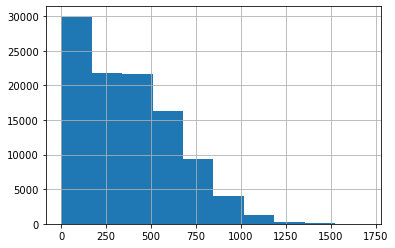

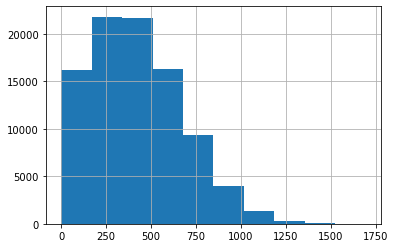

In [12]:
no_zeros = internet.query('mb_used != 0')
display(internet.describe())
display(no_zeros.describe())
internet['mb_used'].hist(lw=3);
plt.show()
no_zeros['mb_used'].hist(lw=3);
plt.show()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


,user_id,duration
count,110901.000000,110901.000000
mean,1247.511871,8.378196
std,139.475249,5.354567
min,1000.000000,0.010000
25%,1127.000000,4.150000
50%,1247.000000,7.710000
75%,1365.000000,11.820000
max,1499.000000,37.600000


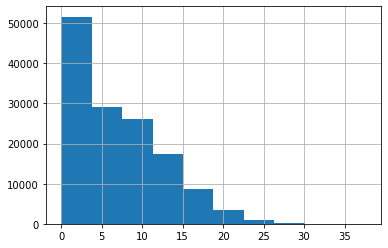

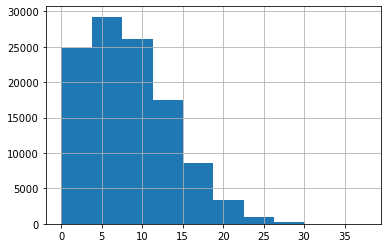

In [13]:
no_zeros = calls.query('duration != 0')
display(calls.describe())
display(no_zeros.describe())
calls['duration'].hist();
plt.show()
no_zeros['duration'].hist();
plt.show()

In [14]:
print(len(calls[calls.duration == 0]))
calls.drop(calls[calls.duration == 0].index, inplace=True)
print(len(calls[calls.duration == 0]))

26834
0


#### Conclusion:
Since I believe that these might be missed calls and the rest of my research depends on the aggregated data- it won't affect the sums in the aggregated tables. So I dropped those rows because these values will not affect the main calculations.

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
As a whole you can delete these zero values from calls and mb_used, because these values will not affect the main calculations. Or, if you decided to leave them, it is important to filter your data (delete these values) where it is needed (at the step of calculated the main statistics and creating plots)

#### The number of calls made and minutes used per month per user:

In [15]:
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year
#round the minutes up
calls['duration'] = np.ceil(calls['duration'])
agg_calls = calls.groupby(['user_id', 'month', 'year'])['id'].count().reset_index() # no. of calls per month and user
agg_calls.columns =['user_id', 'month', 'year','no_calls']
agg_mins = calls.groupby(['user_id', 'month', 'year'])['duration'].sum().reset_index() # minutes of calls used per month and user
agg_mins.columns =['user_id', 'month', 'year','calls_duration']
display(agg_calls)
display(agg_mins)

,user_id,month,year,no_calls
0,1000,12,2018,16
1,1001,8,2018,22
2,1001,9,2018,38
3,1001,10,2018,47
4,1001,11,2018,49
...,...,...,...,...
2251,1498,12,2018,32
2252,1499,9,2018,35
2253,1499,10,2018,41
2254,1499,11,2018,39


,user_id,month,year,calls_duration
0,1000,12,2018,124.0
1,1001,8,2018,182.0
2,1001,9,2018,315.0
3,1001,10,2018,393.0
4,1001,11,2018,426.0
...,...,...,...,...
2251,1498,12,2018,339.0
2252,1499,9,2018,346.0
2253,1499,10,2018,385.0
2254,1499,11,2018,308.0


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
Here you can create one common dataframe with calls number and calls duration, try to use `pivot_table()` to do it, it is more optimal alternative.
 
Example:

`calls = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()`

#### <font color='Purple'>Student's commentary:</font> I calculated it using groupby as Anastasia showed in the webinar. I would like to understand better why is it a more optimal alternative to use pivot instead? <a class="tocSkip"> </div>

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
As for using `np.ceil()` it is absolutely correct action to ceil values in calls duration and mb_used, but you can use `np.ceil` without apply, this method can work with the whole dataframe at once.

#### The number of text messages sent per month

In [16]:
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year
agg_messages = messages.groupby(['user_id', 'month', 'year'])['id'].count().reset_index() # no. of sms per month and user
agg_messages.columns =['user_id', 'month', 'year','massages']
display(agg_messages)

,user_id,month,year,massages
0,1000,12,2018,11
1,1001,8,2018,30
2,1001,9,2018,44
3,1001,10,2018,53
4,1001,11,2018,36
...,...,...,...,...
1801,1496,9,2018,21
1802,1496,10,2018,18
1803,1496,11,2018,13
1804,1496,12,2018,11


#### The volume of data per month

In [17]:
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year
agg_internet = internet.groupby(['user_id', 'month', 'year'])['mb_used'].sum().reset_index() # mb volume used per month per user
agg_internet.columns =['user_id', 'month', 'year','mb_vol']
agg_internet['gb_vol'] = np.ceil((agg_internet['mb_vol']/1024))
display(agg_internet)

,user_id,month,year,mb_vol,gb_vol
0,1000,12,2018,1901.47,2.0
1,1001,8,2018,6919.15,7.0
2,1001,9,2018,13314.82,14.0
3,1001,10,2018,22330.49,22.0
4,1001,11,2018,18504.30,19.0
...,...,...,...,...,...
2272,1498,12,2018,23137.69,23.0
2273,1499,9,2018,12984.76,13.0
2274,1499,10,2018,19492.43,20.0
2275,1499,11,2018,16813.83,17.0


<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b>
       
Tal, one gb contains 1024 mb, not 1000.

#### The monthly revenue from each user

In [18]:
#creating a sub dataframe user_plan that describes for each user which plan he got
user_plan = users[['user_id','plan']].copy()
#list of all the pivot tables I want to merge together
data_frames = [agg_mins, agg_messages, agg_internet]
#merging based on user_id and month-year
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month', 'year'],
                                            how='outer'), data_frames)
#merging the plan based on user_id
df_merged_plan = pd.merge(left = df_merged , 
                right = user_plan, how='outer',on=['user_id'])

In [19]:
display(df_merged_plan)

,user_id,month,year,calls_duration,massages,mb_vol,gb_vol,plan
0,1000,12.0,2018.0,124.0,11.0,1901.47,2.0,ultimate
1,1001,8.0,2018.0,182.0,30.0,6919.15,7.0,surf
2,1001,9.0,2018.0,315.0,44.0,13314.82,14.0,surf
3,1001,10.0,2018.0,393.0,53.0,22330.49,22.0,surf
4,1001,11.0,2018.0,426.0,36.0,18504.30,19.0,surf
...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate


In [20]:
#check the number of unique users
print(len(users['user_id'].unique()))
print(len(df_merged_plan['user_id'].unique()))

500
500


In [21]:
#check if the number of minutes from the final table and the original are the same.
print(df_merged_plan['calls_duration'].sum())
print(calls['duration'].sum())

984347.0
984347.0


In [22]:
#check if the number of SMS from the final table and the original are the same.
print(df_merged_plan['massages'].sum())
print(messages['message_date'].count())

76051.0
76051


In [23]:
#check if the number of GB from the final table and the original are the same.
print(df_merged_plan['mb_vol'].sum())
print(internet['mb_used'].sum())

38440763.70999999
38440763.71


I checked my aggregated joined table to make sure all the data stayed intact and it's good :)

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 

Ok, you correctly merged the dataframes, also agree with all your calculations, you are doing great!
        
And it is a correct action to merge the dataframes with the argument `how = outer`, because if we use another type of merging (inner for example) we can loose unique users.



<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>
       
I would like to recommend you to check the dataframes after the merging.

How you can check the correctness of the merging of the dataframes?
        
* check the number of unique users (there should be as many of them as in the original dataframe)
        
* you can also check if the number of minutes, SMS and GB from the final table and the original are the same. </div>

I created a united dataframe `df_merged_plan` with all the relevant favtors per user per month. Now I'll create a function to calculate the revenue and apply it to a new column

In [24]:
def rev_calc(row):
    if row['plan'] == 'surf':
        surf = plans.query('plan_name == "surf"')
        rev = 20
        #calculate the surf plan overtime minutes payment using the plans dataframe
        if row['calls_duration'] > surf['minutes_included'].max():
            rev += (row['calls_duration'] - surf['minutes_included'].max()) * surf['usd_per_minute'].max()
        #calculate the surf plan messages payment using the plans dataframe
        if row['massages'] > surf['messages_included'].max():
            rev += (row['massages'] - surf['messages_included'].max()) * surf['usd_per_message'].max()
        #calculate the surf plan overtime GB payment using the plans dataframe
        if row['gb_vol'] > 15:
            rev += (row['gb_vol'] - 15)*surf['usd_per_gb'].max()
    else:
        rev = 70
        ultimate = plans.query('plan_name == "ultimate"')
        #calculate the ultimate plan overtime minutes payment using the plans dataframe
        if row['calls_duration'] > ultimate['minutes_included'].max():
            rev += (row['calls_duration'] - ultimate['minutes_included'].max()) * ultimate['usd_per_minute'].max()
        #calculate the surf ultimate messages payment using the plans dataframe
        if row['massages'] > ultimate['messages_included'].max():
            rev += (row['massages'] - ultimate['messages_included'].max()) * ultimate['usd_per_message'].max()
        #calculate the ultimate plan overtime GB payment using the plans dataframe
        if row['gb_vol'] > 30:
            rev += (row['gb_vol'] - 30) * ultimate['usd_per_gb'].max()
    return rev

df_merged_plan['revenue'] = df_merged_plan.apply(rev_calc,axis=1)
df_merged_plan.columns = ['user_id','month','year','calls_duration','massages','mb_vol','gb_vol','plan','revenue']
display(df_merged_plan)

,user_id,month,year,calls_duration,massages,mb_vol,gb_vol,plan,revenue
0,1000,12.0,2018.0,124.0,11.0,1901.47,2.0,ultimate,70.00
1,1001,8.0,2018.0,182.0,30.0,6919.15,7.0,surf,20.00
2,1001,9.0,2018.0,315.0,44.0,13314.82,14.0,surf,20.00
3,1001,10.0,2018.0,393.0,53.0,22330.49,22.0,surf,90.09
4,1001,11.0,2018.0,426.0,36.0,18504.30,19.0,surf,60.00
...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,20.00
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,20.00
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,20.00
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,70.00


<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Tal, you managed to create a very effective function fot revenue calculation, agree with your results.

### Analyze the data

#### Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month

In [25]:
surf = df_merged_plan.query(('plan == "surf"'))
ultimate = df_merged_plan.query(('plan == "ultimate"'))

for col in ['calls_duration', 'massages', 'gb_vol', 'revenue']:
    print(F'Surf plan {col} info')
    print('')
    display(surf[col].describe())
    print('')
    print(F'Ultimate plan {col} info')
    print('')
    display(ultimate[col].describe())
    print('')

Surf plan calls_duration info



count    1544.000000
mean      436.802461
std       229.088544
min         2.000000
25%       279.000000
50%       430.000000
75%       579.000000
max      1510.000000
Name: calls_duration, dtype: float64


Ultimate plan calls_duration info



count     712.000000
mean      435.286517
std       237.459650
min        10.000000
25%       263.000000
50%       425.500000
75%       566.000000
max      1369.000000
Name: calls_duration, dtype: float64


Surf plan massages info



count    1222.000000
mean       40.109656
std        33.035500
min         1.000000
25%        16.000000
50%        32.000000
75%        54.000000
max       266.000000
Name: massages, dtype: float64


Ultimate plan massages info



count    584.000000
mean      46.296233
std       32.942118
min        1.000000
25%       21.000000
50%       41.000000
75%       66.000000
max      166.000000
Name: massages, dtype: float64


Surf plan gb_vol info



count    1558.000000
mean       16.831194
std         7.711922
min         1.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_vol, dtype: float64


Ultimate plan gb_vol info



count    719.000000
mean      17.331015
std        7.648185
min        1.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: gb_vol, dtype: float64


Surf plan revenue info



count    1579.000000
mean       60.551729
std        55.339379
min        20.000000
25%        20.000000
50%        40.180000
75%        80.315000
max       590.370000
Name: revenue, dtype: float64


Ultimate plan revenue info



count    724.000000
mean      72.301105
std       11.364839
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: revenue, dtype: float64

#### Plot histograms. Describe the distributions.

BLUE = SURF plan users and GREEN = ULTIMATE plan users


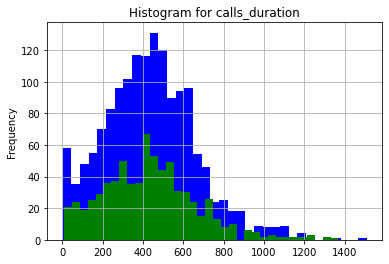

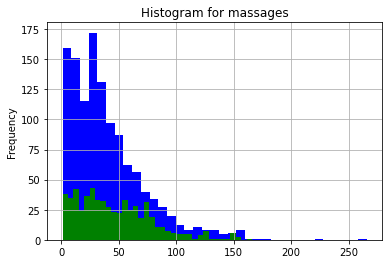

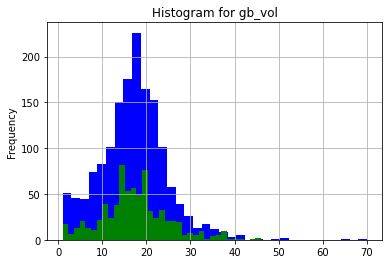

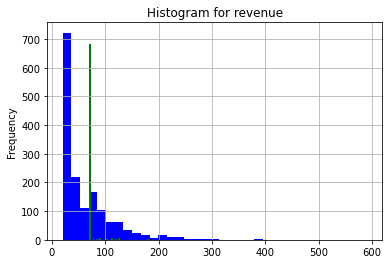

In [26]:
print('BLUE = SURF plan users and GREEN = ULTIMATE plan users')

for col in ['calls_duration', 'massages', 'gb_vol', 'revenue']:
    surf[col].plot(kind='hist',bins=35,title='Histogram for '+col,grid=True, color='blue')
    ultimate[col].plot(kind='hist',bins=35,title='Histogram for '+col,grid=True, color = 'green')
    plt.show()

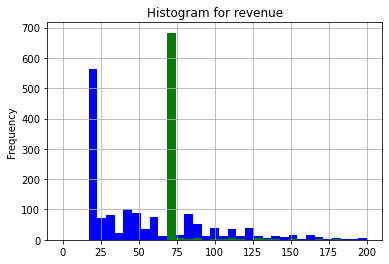

In [27]:
# let's take a closer look on the revenue
surf['revenue'].plot(kind='hist',bins=35,title='Histogram for revenue',grid=True, color='blue',range=(0,200))
ultimate['revenue'].plot(kind='hist',bins=35,title='Histogram for revenue',grid=True, color = 'green',range=(0,200))
plt.show()

#### Conclusion:

I sliced the data to 2 populations- surf plan clients and ultimate plan clients and researched every group seperately.
The blue histograms are for the SURF distribution. this populaiton is much bigger than ULTIMATE.

calls_duration: 
The distribution of both groups distribute pretty similarly a little bit skewed to the right.
               SURF: The mean is 436.5 with a standart deviation of 229 and median is 430- pretty close to the mean
               ULTIMATE: THe mean is 434.6 with a standart deviation of 237.8 and median is 425
               
               By these numbers it seems that surf have a liitle longer calls also by mean and by median and the group is more dense 

massages: 
The distribution of surf is very narrow and very right skewed. The distrubution of ultimate is wide and low and a little right skewed
               SURF: The mean is 40 with a standart deviation of 33 and median is 32- the mean is much higher than the median. guess there are many high outliers that affect the mean much more than the median.
               ULTIMATE: THe mean is 46.3 with a standart deviation of 33 and median is 41 - here too the mean is higher than the median
               
               Judging by the means and medians it seems that ultimate have more massages per month and user and the std of both groups is the same
                
gb_vol:
The distribution of both groups distributes pretty similarly and evenly with a small right tail. ultimate group has some sub peaks more than surf.
             SURF: The mean is 17.2 with a standart deviation of 7.8 and median is 17- the mean and median are very close - it's almost symetric. 
             ULTIMATE: THe mean is 17.7 with a standart deviation of 7.8 and median is 17 - here too the mean is close to the median
                
                Both distributions are almost identical- use GB in the same pattern, and differ only by the size of the population
                
revenue:
The distribution of the 2 groups are distributed in a very different way. The surf group has a huge peak at around 20 dollars with a long right tail and ultimate has a huge peak around 70 dollars with a long right tail too.
              SURF: The mean is 60.5 with a standard deviation of 50.3 and median is 40.1- the mean is much much higher than the median with a huge std as we saw in the chart it's highly skewed to the right. 
              ULTIMATE: The mean is 72.3 with a standard deviation of 11.4 and median is 70 - The mean is close to the median cause all the data is really concentrated around 70 with some high outliers but not as thick tail as in surf plan.
              
              Judging by median and mean as well the ultimate plan is much more profitable than surf.


<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, as a whole your decicion is correct at this step of the analysis: it is great that you correctly formatted the plots and formulated so comprehensive conclusion.

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b>
        
But it is also important to built histograms (and analyse) for the revenue per tariff, so, please, try add this.

## Test the hypotheses

### The average revenue from users of Ultimate and Surf calling plans differs

The null hypothesis H0 would be: The mean revenue of `Ultimate` and `Surf` is equal. We would try to reject it using T-test. The alternative hypothesis H1 will be that it's different. I will set our significance level parameter alpha to 0.05 as it's common.

In [28]:
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(surf['revenue'], ultimate['revenue'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  1.724423314124219e-08
We reject the null hypothesis


#### Conclusion:

I used the t-test hypothesis on the equality of two population means. Hence I formulated the null hypothesis based on equality and used two tailed technique since we're only looking for a difference no matter which size. --> This is why I compared the pvalue to alpha and it was smaller.
The test concluded we reject the null hypotheses thus we can say that the average revenue from users of Ultimate and Surf calling plans differ.

### The average revenue from users in NY-NJ area is different from that of the users from other regions

I'll start by creating a flag column (boolean) in users table that will mark which user lives in NY-NJ area

In [29]:
users['isNYNJ'] = users.apply(lambda row:'NY-NJ' in row['city'], axis=1)
display(users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,isNYNJ
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2050-01-01,False
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2050-01-01,False
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2050-01-01,False
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2050-01-01,False
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2050-01-01,False
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2050-01-01,True
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2050-01-01,False
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2050-01-01,False
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2050-01-01,True


Now I will merge the new column with my joined dataset `df_merged_plan`

In [30]:
#creating a sub dataframe user_area that describes for each user if he belongs to NY-NJ or not 
#in order to merge just one column
user_area = users[['user_id','isNYNJ']].copy()
df_merged_area = pd.merge(left = df_merged_plan , 
                right = user_area, how='left',on=['user_id'])
df_merged_area

,user_id,month,year,calls_duration,massages,mb_vol,gb_vol,plan,revenue,isNYNJ
0,1000,12.0,2018.0,124.0,11.0,1901.47,2.0,ultimate,70.00,False
1,1001,8.0,2018.0,182.0,30.0,6919.15,7.0,surf,20.00,False
2,1001,9.0,2018.0,315.0,44.0,13314.82,14.0,surf,20.00,False
3,1001,10.0,2018.0,393.0,53.0,22330.49,22.0,surf,90.09,False
4,1001,11.0,2018.0,426.0,36.0,18504.30,19.0,surf,60.00,False
...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,20.00,False
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,20.00,False
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,20.00,False
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,70.00,False


The null hypothesis H0 would be: The mean revenue of NY-NJ area and the rest is equal. We would try to reject it using T-test. The alternative hypothesis H1 will be that it's different. I will set our significance level parameter alpha to 0.05 as it's common.

In [31]:
# creating the two samples of the data equivalent to the research question
NY_NJ = df_merged_area.query('isNYNJ')
other = df_merged_area.query('~isNYNJ')

alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(NY_NJ['revenue'], other['revenue'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.049745282774076104
We reject the null hypothesis


#### Conclusion:

I used the t-test hypothesis on the equality of two population means. Hence I formulated the null hypothese based on equality and used two tailed technique since we're only looking for differnece no matter which size. (otherwise I would compare pvalue/2) --> This is why I compared the pvalue to alpha and it was bigger.
The test concluded we cannot reject the null hypotheses thus we can say that the average revenue from users who live in NY-NJ area is not considerably different than other areas

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Tal, agree with your decision at this step of the analysis: you correctly formulated H0 and H1, you also correctly chose the test.

## <a id='section5'></a> Overall conclusion

 I started with 5 datasets: fact table with general information about each user, fact table with general information about the 2 plans of the company and 3 log datasets with records of each call, massage and internet surfing.
I started studying the data using the explore function I wrote and applied on each table using a loop. I looked at the value_counts of some main columns and noticed some big amount of  0s in mb_used in internet and in duration of calls. I studied them and decided to keep them since I’m aggregating everything by user and month and the zeroes won’t matter. 

I also found many missing values in users.churn_date which I later filled with the future date 1.1.2050 (Assuming internet and phone plans have a limited lifetime). 
Then I changed all the datatypes using astype and pd.to_datetime.
Then I aggregated the tables per user and month and year and calculated the following:
The number of calls made and minutes used per month - I rounded the minutes up and only then grouped it
The number of text messages sent per month
The volume of data per month - I grouped it and then created another column gb_used and rounded it up and divided by 1000

Then I merged 4 of the tables. I merged calls, internet and messages (outer join) by user and month and year and then joined it with users (outer join) only by user_id to get the plan for each user all in the same table.
The monthly revenue from each user - I used the aggregated merged table and added a revenue column to see the revenue per user and month. I applied the rev_calc function I wrote and the table plans in order to calculate the monthly revenue from each user depending on the plan he has.

Then I started analyzing the data. I used a loop to describe each column. Then I created 2 slices of the dataset called `surf` and `ultimate` in order to describe the customers' behavior and find the minutes, texts, and volume of data the users of each plan require per month. I used a loop that shows the histogram of each column and compared it with the equivalent histogram in the other plan. I concluded that calls’ durations are a little longer on `surf` compared to `ultimate`. `ultimate` users send more messages on a monthly average than ‘surf’ users. Both plans’ users use the same amount of GB in monthly average  when surfing the net. 
And then to the main goal -Test the hypotheses! I tested 2 hypotheses using the t-test that we learned on the platform.

1. The average revenue from users of Ultimate and Surf calling plans differs: 

I used the t-test hypothesis on the equality of two population means. Hence I formulated the null hypothesis based on equality and used two tailed technique since we're only looking for a difference no matter which size. --> This is why I compared the pvalue to alpha and it was smaller.
The test concluded we reject the null hypotheses thus we can say that the average revenue from users of Ultimate and Surf calling plans differ.
Adding the conclusion I had in the previous section from the histogram and means and medians of both plans it seems that ultimate is more profitable than surf for Megaline

2. The average revenue from users in NY-NJ area is different from that of the users from other regions:

I created 2 samples for users who belong to NY-NJ area and the rest of the users.
I set the null hypothesis H0 to be: The mean revenue of NY-NJ area and the rest is equal. I used a T-test. The alternative hypothesis H1 was that it's different. I set the significance level parameter alpha to be 0.05 as it's common to do so.  The test concluded we cannot reject the null hypotheses thus we can say that the average revenue from users who live in NY-NJ area is not considerably different than other areas


<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b>
        
Tal, in your final conclusion you need to fix the recommendation for client: which plan is more profitable for Megaline?

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion**

Tal, thank you for submitting your project! I can see that you've worked really hard on it! I'm really impressed this the amount of work you have done. But there are several things in your project which I suppose it is important to fix in order to make your project really ideal! My comments will navigate you!


**Good things and practices in your project I want to highlight🙂**:
* It was a pleasure for me to review your project because you have paid a great attention to the formatting of the code and commentaries!  A big plus for it!
* You use different methods for working with your data. It is really great that you can apply these methods on practice, keep it up!
* You formulated very deep and concrete conclusions at each step of the analysis, your final conclusion is really comprehensive and valuable, great analytical job!
* You have used the visualization a lot and formatted it correctly, good job!

**What is worth working on👀**:

* all recommendations for the project's improvement you will find in my comments!

**Good luck! I will wait for your work for a second iteration of the review!😉**
![gif](https://media.giphy.com/media/LmNwrBhejkK9EFP504/giphy.gif)  